# Implementación de un modelo de Machine Learning supervisado para predecir la supervivencia en el Titanic

## Implementación de Regresión Lineal para predecir la supervivencia en el Titanic

## 1. Instalar e importar librerías

In [1]:
# Instalar las librerías necesarias
!pip install pandas numpy matplotlib scikit-learn

# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn import metrics  # Agregamos la importación de metrics

## 2. Carga del dataset Titanic

In [2]:
# Cargar el dataset del Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

In [3]:
# Verificar las primeras filas del dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Análisis exploratorio de datos

In [4]:
# Analizar el dataset y preprocesar los datos
# Por ejemplo, eliminar columnas irrelevantes o tratar los valores faltantes

In [5]:
# Analizar la distribución de las variables
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


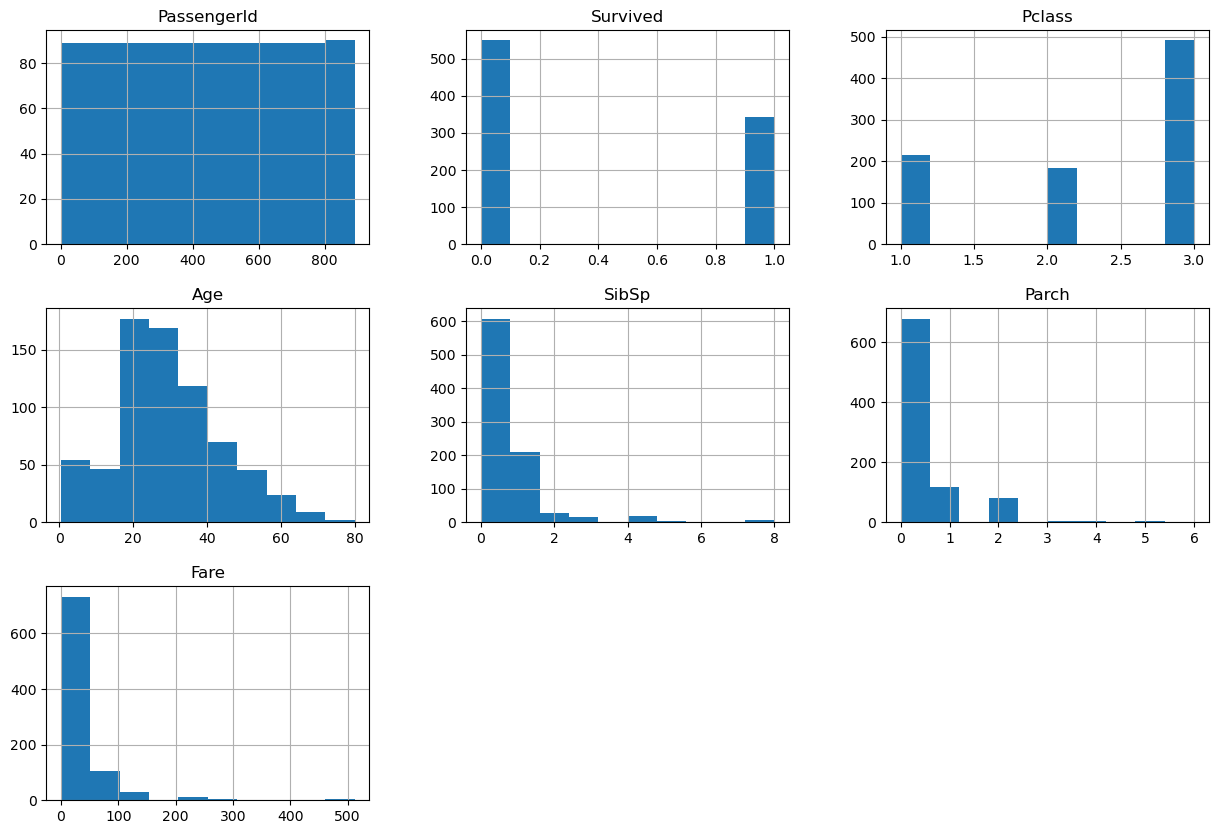

In [6]:
# Visualizar la distribución de las variables numéricas
titanic_data.hist(figsize=(15, 10))
plt.show()

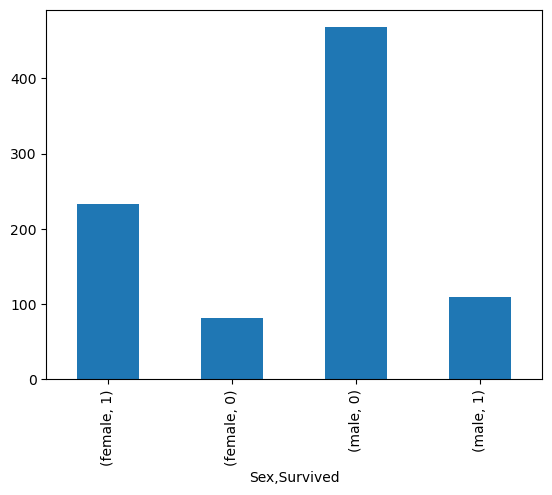

In [7]:
# Visualizar la distribución de las variables categóricas
titanic_data.groupby("Sex")["Survived"].value_counts().plot(kind="bar")
plt.show()

In [8]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 4. Preprocesamiento de datos y Selección de características

In [9]:
# Seleccionar las características que queremos usar para predecir la variable objetivo (en este caso, 'Age' y 'Fare')
X = titanic_data[['Age', 'Fare']]
y = titanic_data['Survived']  # Variable objetivo

# Manejar los valores faltantes: rellenar los valores faltantes con la media de la columna
X = X.fillna(X.mean())

# 6. División del dataset en Train y Test

In [10]:
# Crear un imputador para rellenar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

In [11]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Entrenamiento del modelo

In [12]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [13]:
# Rellenar los valores faltantes en el conjunto de características X
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [14]:
# Entrenar el modelo de regresión lineal con los datos imputados
model.fit(X_train_imputed, y_train)

LinearRegression()

# 8. Evaluación del modelo

Coeficientes: [-0.00284769  0.00236099]
Intercepto: 0.38358432610605236
Error absoluto medio: 0.44283200716053644
Error cuadrático medio: 0.21889780986919855
Raíz del error cuadrático medio: 0.4678651620597526


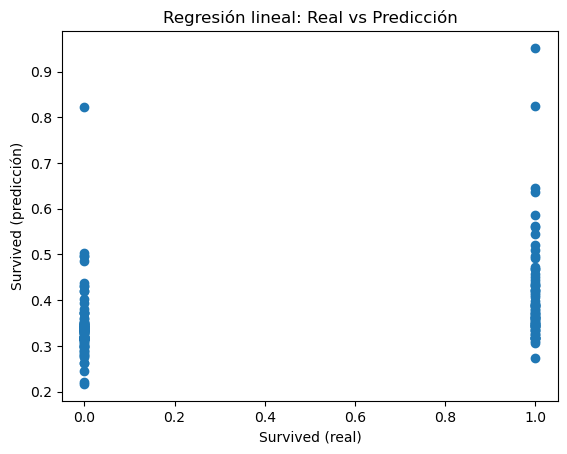

In [15]:
# Entrenar el modelo de regresión lineal con los datos imputados
model.fit(X_train_imputed, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Evaluar el modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Graficar los resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Survived (real)')
plt.ylabel('Survived (predicción)')
plt.title('Regresión lineal: Real vs Predicción')
plt.show()


# Histograma de Edades:

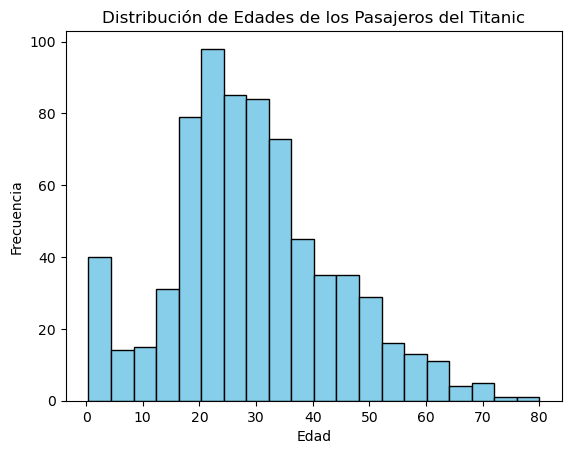

In [16]:
import matplotlib.pyplot as plt

plt.hist(titanic_data['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Pasajeros del Titanic')
plt.show()

# Gráfico de Barras de Supervivencia por Género

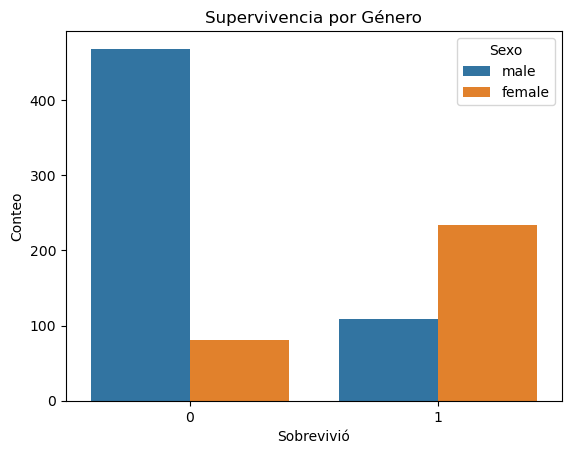

In [17]:
import seaborn as sns

sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.xlabel('Sobrevivió')
plt.ylabel('Conteo')
plt.title('Supervivencia por Género')
plt.legend(title='Sexo', loc='upper right')
plt.show()

# Gráfico de Barras de Supervivencia por Clase de Pasajero

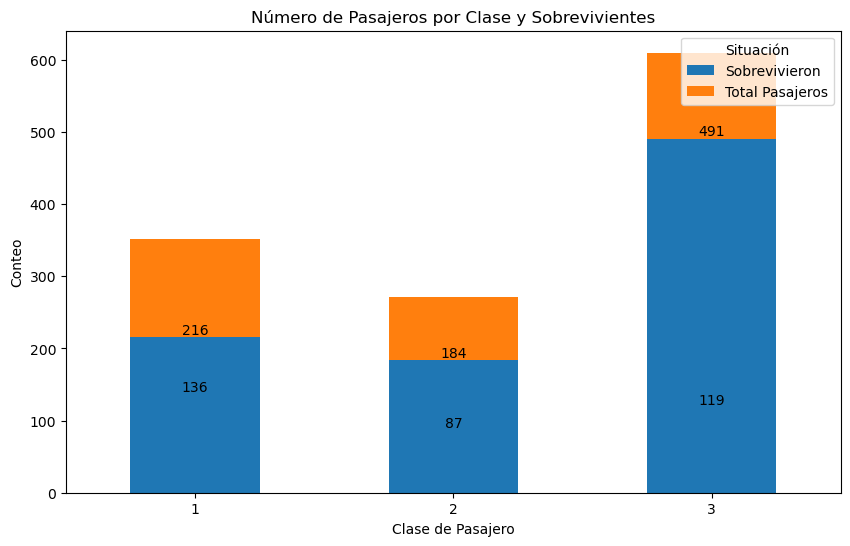

In [18]:
import seaborn as sns

# Calcular los recuentos de cada categoría
total_counts = titanic_data.groupby('Pclass').size().reset_index(name='Total')
survival_counts = titanic_data[titanic_data['Survived'] == 1].groupby('Pclass').size().reset_index(name='Survived')

# Fusionar los recuentos de total y supervivencia en un solo DataFrame
merged_counts = pd.merge(total_counts, survival_counts, on='Pclass', how='left')

# Renombrar columnas para mayor claridad
merged_counts.rename(columns={'Total': 'Total Pasajeros', 'Survived': 'Sobrevivieron'}, inplace=True)

# Crear el gráfico de barras
ax = merged_counts.plot(x='Pclass', kind='bar', stacked=True, figsize=(10, 6))

# Agregar etiquetas de recuento sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Personalizar el gráfico
plt.xlabel('Clase de Pasajero')
plt.ylabel('Conteo')
plt.title('Número de Pasajeros por Clase y Sobrevivientes')
plt.xticks(rotation=0)
plt.legend(title='Situación', loc='upper right', labels=['Sobrevivieron', 'Total Pasajeros'])
plt.show()

# Diagrama de Violín de Tarifa por Supervivencia

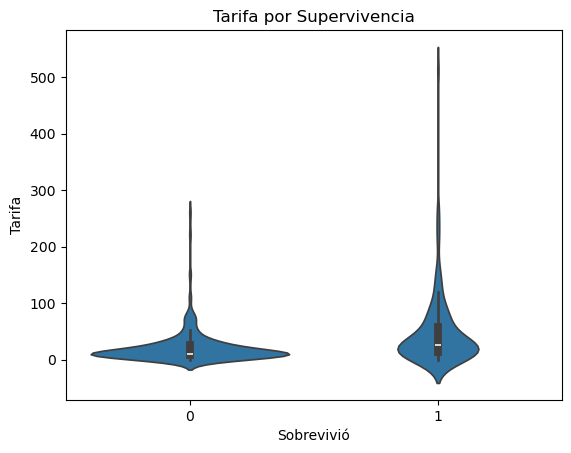

In [19]:
sns.violinplot(x='Survived', y='Fare', data=titanic_data)
plt.xlabel('Sobrevivió')
plt.ylabel('Tarifa')
plt.title('Tarifa por Supervivencia')
plt.show()

# Diagrama de Torta de Proporción de Supervivencia

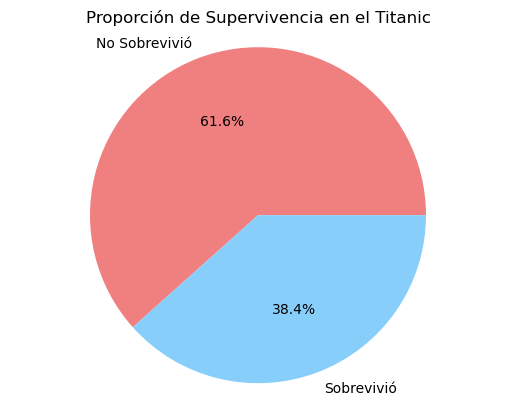

In [20]:
sizes = titanic_data['Survived'].value_counts()
plt.pie(sizes, labels=['No Sobrevivió', 'Sobrevivió'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Proporción de Supervivencia en el Titanic')
plt.axis('equal')
plt.show()

# Gráfico de Dispersión de Edad vs. Tarifa

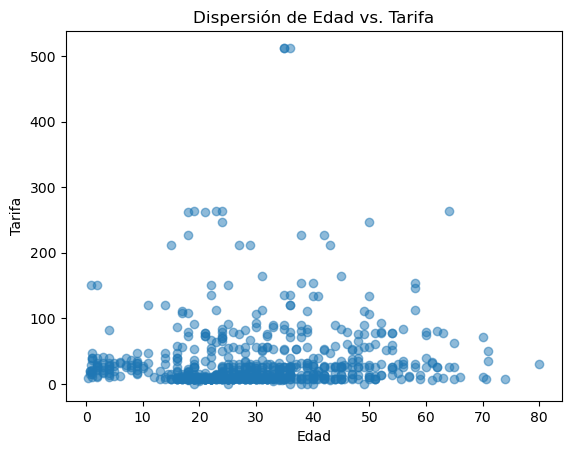

In [21]:
plt.scatter(titanic_data['Age'], titanic_data['Fare'], alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Dispersión de Edad vs. Tarifa')
plt.show()

# Mapa de Calor de Correlación

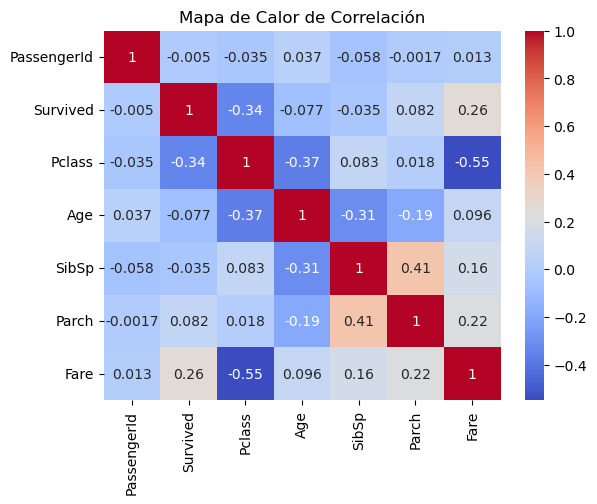

In [22]:
# Seleccionar solo características numéricas
titanic_numeric = titanic_data.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación
corr = titanic_numeric.corr()

# Crear el mapa de calor de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [23]:
# Cuántos abordaron por sexo
aboard_by_sex = titanic_data['Sex'].value_counts()

# Cuántos abordaron por puerto de embarque
aboard_by_embarked = titanic_data['Embarked'].value_counts()

# Calcular la edad escalada en diferentes grupos de edad
titanic_data['Age_group'] = pd.cut(titanic_data['Age'], bins=[0, 18, 62, np.inf], labels=['Menores de edad', 'Adultos', 'Tercera edad'])
aboard_by_age_group = titanic_data['Age_group'].value_counts()

# Calcular las tarifas segmentadas
fare_mean = titanic_data['Fare'].mean()
titanic_data['Fare_segment'] = pd.cut(titanic_data['Fare'], bins=[0, fare_mean, np.inf], labels=['Baja', 'Alta'])
aboard_by_fare_segment = titanic_data['Fare_segment'].value_counts()

# Mostrar el resumen numérico
print("Resumen Numérico:")
print("-" * 40)
print("Abordaron por sexo:\n", aboard_by_sex)
print("\nAbordaron por puerto de embarque:\n", aboard_by_embarked)
print("\nAbordaron por grupo de edad:\n", aboard_by_age_group)
print("\nAbordaron por segmento de tarifa:\n", aboard_by_fare_segment)


Resumen Numérico:
----------------------------------------
Abordaron por sexo:
 Sex
male      577
female    314
Name: count, dtype: int64

Abordaron por puerto de embarque:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Abordaron por grupo de edad:
 Age_group
Adultos            560
Menores de edad    139
Tercera edad        15
Name: count, dtype: int64

Abordaron por segmento de tarifa:
 Fare_segment
Baja    665
Alta    211
Name: count, dtype: int64


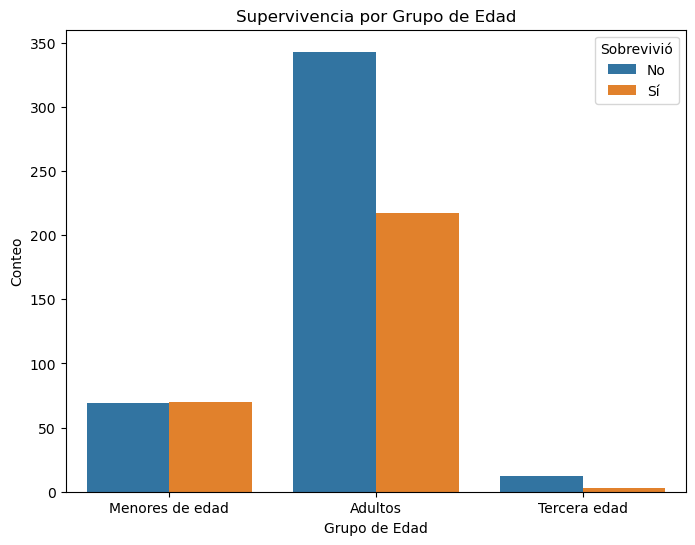

In [27]:
import matplotlib.pyplot as plt

# Gráfico de barras para grupo de edad vs sobrevivientes
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_group', hue='Survived', data=titanic_data)
plt.title('Supervivencia por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Conteo')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()